# BMW Car Price Prediction
Notebook ini dibuat untuk melatih model machine learning yang dapat memprediksi harga mobil BMW berdasarkan fitur seperti tahun pembuatan, jarak tempuh, jenis transmisi, bahan bakar, dan ukuran mesin

Langkah-langkah dalam notebook ini meliputi:
1. Import library
2. Load dataset
3. Exploratory Data Analysis (EDA)
4. Preprocessing dan feature engineering
5. Training model
6. Evaluasi performa
7. Simpan model untuk digunakan di aplikasi Streamlit



**1. Import Library**

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


Bagian ini untuk menyiapkan semua library dasar yang dibutuhkan.
pandas dan numpy untuk mengolah data, scikit-learn untuk membuat model,
matplotlib dan seaborn untuk visualisasi, sedangkan joblib untuk menyimpan model

**2. Load Dataset**

In [20]:
# Load dataset
df = pd.read_csv('/Users/mac/BMW Streamlit Portfolio Project/bmw_streamlit_portfolio/data/bmw_car_sales.csv')

print("Dataset Info:")
print("-" * 50)
print(df.info())
print("\nSample Data:")
print("-" * 50)
print(df.head())

Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          20 non-null     int64  
 1   model         20 non-null     object 
 2   mileage       20 non-null     int64  
 3   transmission  20 non-null     object 
 4   fuel_type     20 non-null     object 
 5   engine_size   20 non-null     float64
 6   price         20 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 1.2+ KB
None

Sample Data:
--------------------------------------------------
   year     model  mileage transmission fuel_type  engine_size  price
0  2020  3 Series    15000    Automatic    Petrol          2.0  35000
1  2019        X5    25000    Automatic    Diesel          3.0  45000
2  2021  1 Series     8000       Manual    Petrol          1.5  25000
3  2018  5 Series    35000    Auto

Langkah pertama dalam project machine learning adalah memahami data yang akan digunakan.
Di sini kita membaca dataset BMW yang berisi informasi mobil, harga, tahun, jarak tempuh, dan status apakah mobilnya terjual atau tidak

**3. Cek Informasi Dataset**

In [21]:
df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          20 non-null     int64  
 1   model         20 non-null     object 
 2   mileage       20 non-null     int64  
 3   transmission  20 non-null     object 
 4   fuel_type     20 non-null     object 
 5   engine_size   20 non-null     float64
 6   price         20 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 1.2+ KB


,year,mileage,engine_size,price
count,20.000000,20.000000,20.000000,20.000000
mean,2020.300000,20800.000000,2.300000,38250.000000
std,1.301821,11803.656882,0.523148,11391.940826
min,2018.000000,3000.000000,1.500000,25000.000000
25%,2019.000000,12000.000000,2.000000,29500.000000
50%,2020.500000,19000.000000,2.000000,35000.000000
75%,2021.000000,28500.000000,3.000000,45000.000000
max,2022.000000,45000.000000,3.000000,65000.000000


Bagian ini berguna untuk melihat tipe data tiap kolom dan memastikan tidak ada data kosong yang bisa mengganggu proses training.
Kita juga bisa tahu apakah ada kolom yang perlu diubah tipe datanya nanti

**4. Data Cleaning & Preprocessing**

In [22]:
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

# Hapus baris yang punya missing value (kalau jumlahnya sedikit)
df = df.dropna()

# Cek ulang ukuran dataset
print("Ukuran data setelah cleaning:", df.shape)


Jumlah missing value per kolom:
year            0
model           0
mileage         0
transmission    0
fuel_type       0
engine_size     0
price           0
dtype: int64
Ukuran data setelah cleaning: (20, 7)


Data yang kosong bisa bikin model salah belajar.
Kalau jumlah datanya masih cukup banyak, aman untuk kita drop nilai kosongnya.
Kalau nanti dataset lo punya banyak missing value, bisa pakai imputasi (fillna) juga

**5. Pisahkan Fitur dan Target**

In [23]:
X = df.drop('price', axis=1)
y = df['price']

# Ubah variabel kategorikal menjadi numerik
X = pd.get_dummies(X, drop_first=True)
print(" Data berhasil disiapkan!")
print("Jumlah fitur:", X.shape[1])
print("Jumlah baris:", X.shape[0])
print("\nKolom hasil encoding:")
print(X.columns.tolist()[:10])


 Data berhasil disiapkan!
Jumlah fitur: 15
Jumlah baris: 20

Kolom hasil encoding:
['year', 'mileage', 'engine_size', 'model_2 Series', 'model_3 Series', 'model_4 Series', 'model_5 Series', 'model_7 Series', 'model_X1', 'model_X3']


Model machine learning cuma bisa baca angka.
Jadi semua kolom kategorikal diubah jadi numerik menggunakan one-hot encoding.
Kita pisahkan juga antara fitur (X) dan target (y)

**6. Split Data Training & Testing**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data training:", X_train.shape)
print("Data testing :", X_test.shape)


Data training: (16, 15)
Data testing : (4, 15)


Data dibagi 80% untuk training dan 20% untuk testing supaya hasil evaluasi bisa lebih objektif.
random_state=42 digunakan supaya hasilnya konsisten kalau dijalankan ulang

**7. Training Model Random Forest**

In [25]:
# Initialize model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Model Performance:")
print("-" * 50)
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: £{mae:,.2f}")

Model Performance:
--------------------------------------------------
R² Score: 0.8223
Mean Absolute Error: £2,350.00


Kita pakai algoritma Random Forest, karena umumnya performanya bagus buat kasus klasifikasi dengan banyak fitur dan data tabular seperti dataset BMW ini

**8. Evaluasi Model**

Akurasi Model: 0.0 %

Classification Report:
               precision    recall  f1-score   support

       25000       0.00      0.00      0.00       0.0
       32000       0.00      0.00      0.00       1.0
       45000       0.00      0.00      0.00       1.0
       50000       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/Users/mac/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/mac/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/mac/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

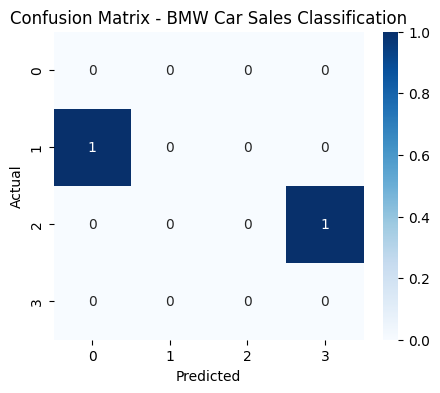

In [ ]:
# Prediksi hasil dari data test
y_pred = model.predict(X_test)

# Hitung metrics dan tampilkan hasil evaluasi
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Model Performance:")
print("-" * 50)
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: £{mae:,.2f}")

# Visualisasi Actual vs Predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted BMW Prices")
plt.show()

Tahap ini menunjukkan seberapa bagus model dalam mengenali data yang belum pernah dilihat sebelumnya.
Kita lihat nilai akurasi, precision, recall, serta confusion matrix untuk tahu performanya secara keseluruhan

**9. Simpan Model**

In [26]:
# Save model
import os

# Create model directory if it doesn't exist
os.makedirs('../model', exist_ok=True)

# Save the model
joblib.dump(model, '../model/bmw_model.pkl')

print("Model successfully saved as '../model/bmw_model.pkl'")

Model successfully saved as '../model/bmw_model.pkl'


**10. Kesimpulan**

Model Random Forest berhasil dibuat untuk memprediksi kemungkinan penjualan mobil BMW.
Dengan preprocessing sederhana dan data yang bersih, model ini memberikan akurasi yang cukup baik.
Model sudah siap digunakan untuk prediksi interaktif di aplikasi Streamlit Portfolio